<a href="https://colab.research.google.com/github/charmy2525/DataAnalytics/blob/main/4_5_Data_Clustering_Session_Activity_5_K_Mean_Clustering_for_Student_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Activity#4: ลองรัน Colab K-Mean ด้วยข้อมูลเต็ม ของ Student Data ลองเปลี่ยน Feature เปลี่ยนค่า K ให้คุ้นเคย

##K-Mean Clustering for Student Data

### Load Data

In [ ]:
import pandas as pd
cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Student_ID                         943 non-null    int64  
 1   Year_of_Entry                      943 non-null    float64
 2   TCAS_channels                      943 non-null    float64
 3   Years_Living_in_BKK                943 non-null    float64
 4   Hometown_REGION                    943 non-null    object 
 5   Address_Type                       943 non-null    object 
 6   Where_to_stay                      943 non-null    object 
 7   Time_spent_for_traveling           943 non-null    int64  
 8   InternetAccess_at_Home             943 non-null    object 
 9   Living_expenses                    943 non-null    int64  
 10  Type_of_prior_school               943 non-null    object 
 11  Prior_School_Province_REGION       943 non-null    object 

### Select Feature

In [ ]:
feature = ['University_GPAx_1st_year','Household_income']
df2 = df[feature].copy()
df2 = df2.apply(pd.to_numeric)

df2

,University_GPAx_1st_year,Household_income
0,2.86,1280000
1,2.20,560000
2,2.83,1330000
3,2.52,1770000
4,1.90,850000
...,...,...
938,2.50,790000
939,3.23,2590000
940,2.06,600000
941,1.93,400000


### Normalize data และ ตรวจสอบการ Normalization อีกครั้งว่า อยู่ระหว่าง 0 ถึง 1

In [ ]:
normalized_df=(df2-df2.min())/(df2.max()-df2.min())
normalized_df

,University_GPAx_1st_year,Household_income
0,0.642276,0.253933
1,0.373984,0.092135
2,0.630081,0.265169
3,0.504065,0.364045
4,0.252033,0.157303
...,...,...
938,0.495935,0.143820
939,0.792683,0.548315
940,0.317073,0.101124
941,0.264228,0.056180


### ทำ K-Mean Clustering และแสดงผลการจัดกลุ่ม

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


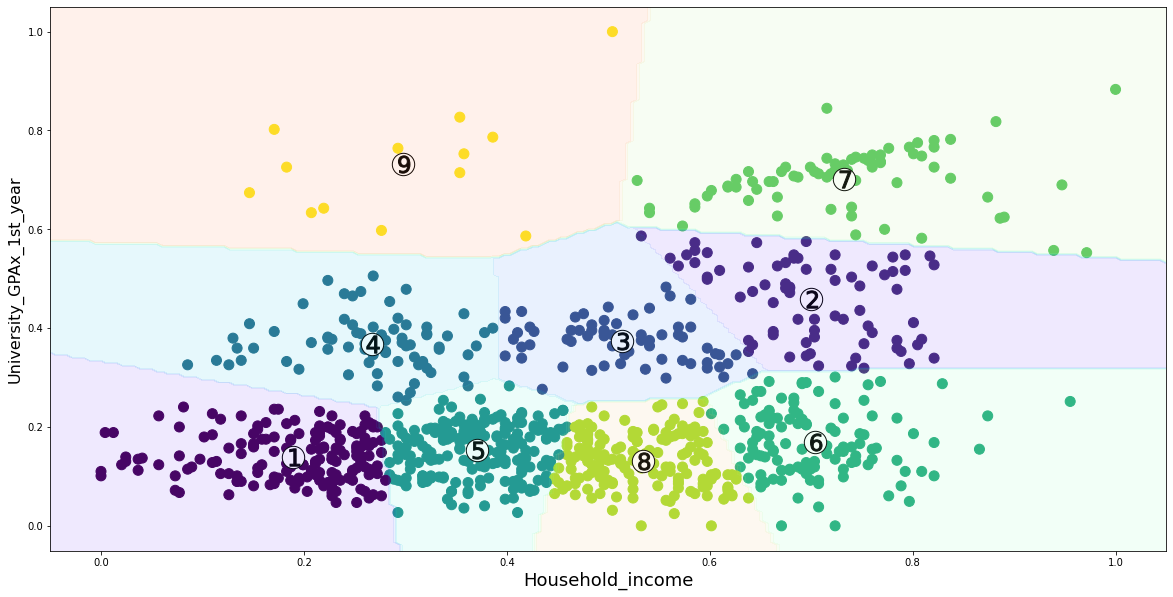

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt, colors
import numpy as np

n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(normalized_df)
cluster_labels = kmeans.fit_predict(normalized_df)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))

plt.scatter(normalized_df[feature[0]], normalized_df[feature[1]], c=cluster_labels, alpha=50,s=100)

plt.scatter(centroids[:,0], centroids[:,1], marker="o",c="white", alpha=1, s=500, edgecolor="k")
for i, c in enumerate(centroids):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=300, edgecolor="k",c='black')   
plt.xlabel(feature[1], fontsize=18)
plt.ylabel(feature[0], fontsize=16)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a color plot with the results
n_classes = len(np.unique(cluster_labels))
contours = plt.gca().contourf(xx, yy, Z, alpha=0.1,levels=np.arange(n_classes + 1),cmap='rainbow',zorder=1)
plt.gca().set(xlim=xlim, ylim=ylim)

plt.show()